<a href="https://colab.research.google.com/github/SohyunKimmm/SohyunKimmm/blob/main/230322_Ashopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 확인 및 상관관계 분석

In [43]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats     

In [44]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [45]:
plt.rc('font', family='NanumBarunGothic')

In [46]:
df = pd.read_excel("/content/drive/MyDrive/230322_ashopping.xlsx")
df

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,6,7,6,7,6,6,6,6,6
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,7,6,5,6,5,7,6,6,6
997,998,0,2741290,10,274129,8,260700,2,4,0,...,5,6,6,6,5,6,4,5,6,5
998,999,0,11268990,15,751266,20,347700,1,3,0,...,5,4,4,4,4,4,5,5,4,4


In [47]:
df.describe()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.067000,7.068690e+06,26.602000,3.173611e+05,16.027000,292371.670000,1.266000,3.093000,0.459000,...,5.762000,5.877000,5.707000,5.81000,5.700000,5.383000,5.427000,5.672000,5.546000,5.526000
std,288.819436,0.250147,6.966355e+06,21.280189,2.310413e+05,8.341334,111937.501042,0.442085,0.988599,0.498566,...,0.796235,0.858258,0.733273,0.78391,0.787795,0.923669,0.992802,0.794385,0.781341,0.736115
min,1.000000,0.000000,2.271880e+06,2.000000,2.246100e+04,1.000000,3750.000000,1.000000,1.000000,0.000000,...,4.000000,4.000000,4.000000,4.00000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000
25%,250.750000,0.000000,3.303285e+06,13.000000,1.781558e+05,9.000000,261686.250000,1.000000,2.000000,0.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
50%,500.500000,0.000000,4.714785e+06,21.000000,2.626210e+05,17.000000,347500.000000,1.000000,3.000000,0.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.250000,0.000000,7.900290e+06,32.000000,3.936732e+05,23.000000,365400.000000,2.000000,4.000000,1.000000,...,6.000000,6.250000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,1000.000000,1.000000,7.707087e+07,203.000000,2.680100e+06,30.000000,400600.000000,2.000000,4.000000,1.000000,...,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [49]:
df.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
dtype: int64

In [50]:
print(len(df))

1000


In [51]:
df.dropna(axis = 0, inplace = True)

In [52]:
df.isnull().sum()

고객ID                0
이탈여부                0
총_매출액               0
방문빈도                0
1회_평균매출액            0
할인권_사용 횟수           0
총_할인_금액             0
고객등급                0
구매유형                0
클레임접수여부             0
구매_카테고리_수           0
거주지역                0
성별                  0
고객_나이대              0
거래기간                0
할인민감여부              0
멤버쉽_프로그램_가입전_만족도    0
멤버쉽_프로그램_가입후_만족도    0
Recency             0
Frequency           0
Monetary            0
상품_만족도              0
매장_만족도              0
서비스_만족도             0
상품_품질               0
상품_다양성              0
가격_적절성              0
상품_진열_위치            0
상품_설명_표시            0
매장_청결성              0
공간_편의성              0
시야_확보성              0
음향_적절성              0
안내_표지판_설명           0
친절성                 0
신속성                 0
책임성                 0
정확성                 0
전문성                 0
dtype: int64

In [53]:
print(len(df))

841


In [54]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성'],
      dtype='object')

In [55]:
df1 = df[['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성']]
df1.corr(method = "pearson")

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
고객ID,1.000000,0.048634,-0.005549,-0.041999,0.034406,0.002068,0.005701,-0.038065,0.041488,0.003185,...,0.049205,-0.018027,-0.059847,-0.052440,-0.019647,-0.012014,0.004208,-0.004732,-0.041513,-0.037296
이탈여부,0.048634,1.000000,-0.059731,-0.095549,0.151351,0.033541,0.027104,0.042512,0.030765,-0.012489,...,0.034612,-0.016434,0.005955,-0.025310,-0.025775,-0.001602,0.033504,0.021398,-0.028181,-0.019514
총_매출액,-0.005549,-0.059731,1.000000,0.608272,0.322110,-0.022616,-0.011678,-0.181633,-0.244750,-0.044381,...,-0.011149,-0.016086,0.008916,-0.028310,0.031115,0.035053,0.001741,-0.010662,0.002605,0.018916
방문빈도,-0.041999,-0.095549,0.608272,1.000000,-0.284934,0.027695,0.065782,-0.263313,-0.443693,-0.092789,...,0.005623,-0.036093,0.007156,0.015782,0.003069,-0.012706,-0.053082,-0.018332,0.017721,-0.006193
1회_평균매출액,0.034406,0.151351,0.322110,-0.284934,1.000000,-0.032862,-0.054592,0.163526,0.036187,0.060081,...,-0.005363,-0.027093,-0.014916,-0.052575,-0.002611,0.024350,0.040983,-0.034166,-0.018953,0.000255
할인권_사용 횟수,0.002068,0.033541,-0.022616,0.027695,-0.032862,1.000000,0.843765,-0.055332,-0.143249,0.026316,...,-0.021230,-0.043477,-0.037841,-0.047642,-0.015007,-0.001161,0.006585,-0.011377,-0.014478,-0.028076
총_할인_금액,0.005701,0.027104,-0.011678,0.065782,-0.054592,0.843765,1.000000,-0.018558,-0.147044,0.034417,...,-0.028601,-0.050792,-0.045481,-0.024206,-0.008125,-0.018028,-0.015995,-0.006893,-0.014288,-0.029530
고객등급,-0.038065,0.042512,-0.181633,-0.263313,0.163526,-0.055332,-0.018558,1.000000,0.130784,0.058658,...,-0.038938,-0.032814,-0.032135,-0.031575,-0.049343,-0.037539,-0.048746,-0.058797,-0.080217,-0.054756
구매유형,0.041488,0.030765,-0.244750,-0.443693,0.036187,-0.143249,-0.147044,0.130784,1.000000,0.079493,...,-0.028082,0.017631,-0.031269,0.015753,-0.035714,0.036324,-0.023021,0.002902,-0.055006,-0.040451
클레임접수여부,0.003185,-0.012489,-0.044381,-0.092789,0.060081,0.026316,0.034417,0.058658,0.079493,1.000000,...,-0.071985,-0.057460,-0.055491,-0.025532,0.002850,0.033526,0.038294,-0.035387,-0.077987,-0.036178


/usr/local/lib/python3.8/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'피어슨 상관계수'}>

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


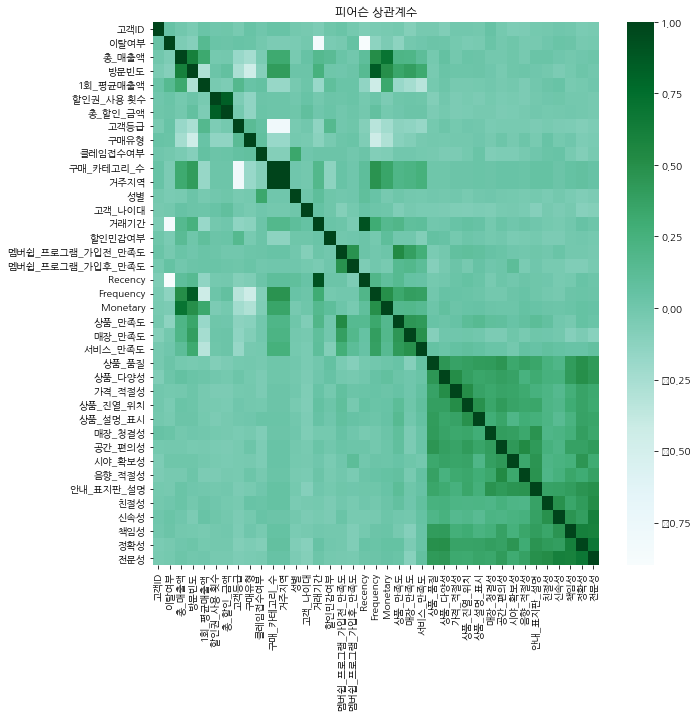

In [56]:
matplotlib.rcParams["font.family"] = "NaNumGothic"
colormap = plt.cm.BuGn 
plt.figure(figsize=(10,10))
plt.title("피어슨 상관계수")
sns.heatmap(df1.astype(float).corr(), cmap=colormap)


# 상관관계가 높은 변수 관계

# 총매출액 - 방문빈도
# 방문빈도 - Frequency
# Frequency - 총매출액
# 총할인금액 - 할인권사용횟수
# 거주지역 - 구매카테고리수
# Recency - 거래기간 

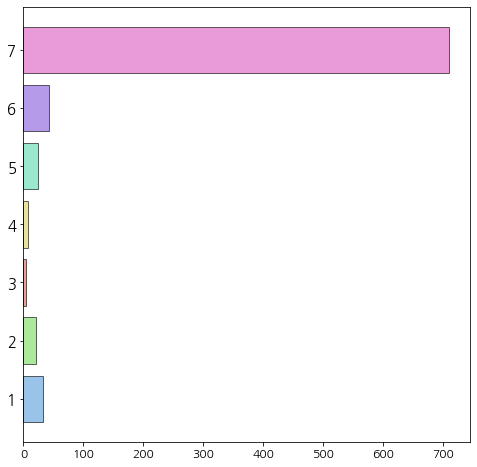

In [57]:
# 'Recency'별 데이터 개수 바 차트로 확인
# '최근성' 점수

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

region_data = Counter(df['Recency']).most_common() ## 데이터 개수가 많은 순으로 출력
region_data = region_data[:7] ## 거주지역 총 7군데

data = [x[1] for x in region_data] ## 데이터 개수
regions = [x[0] for x in region_data] ## 국가

## 수평 바차트에서 데이터 개수와 나라를 맨위로 출력하기 위해서 리스트 순서를 바꿈
regions.reverse()
data.reverse()

## 시각화
fig =plt.figure(figsize=(8,8))
 
fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정

plt.barh(regions, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

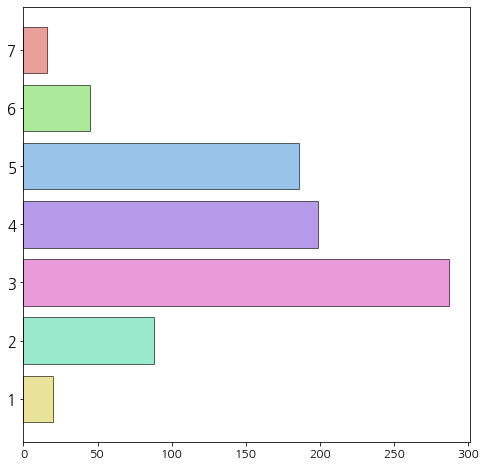

In [58]:
# 'Frequency'별 데이터 개수 바 차트로 확인
# '구매빈도' 점수

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

region_data = Counter(df['Frequency']).most_common() ## 데이터 개수가 많은 순으로 출력
region_data = region_data[:7] ## 거주지역 총 7군데

data = [x[1] for x in region_data] ## 데이터 개수
regions = [x[0] for x in region_data] ## 국가

## 수평 바차트에서 데이터 개수와 나라를 맨위로 출력하기 위해서 리스트 순서를 바꿈
regions.reverse()
data.reverse()

## 시각화
fig =plt.figure(figsize=(8,8))
 
fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정

plt.barh(regions, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

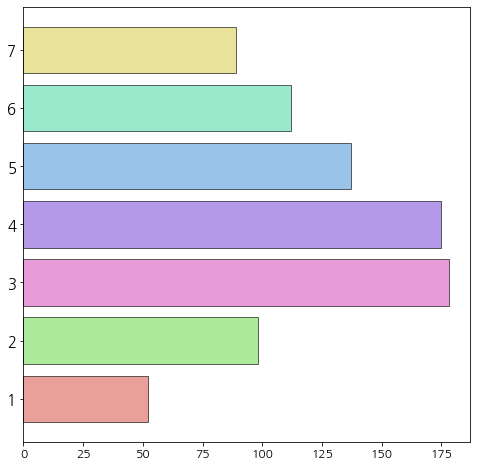

In [59]:
# 'Monetary'별 데이터 개수 바 차트로 확인
# '구매액' 점수

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

region_data = Counter(df['Monetary']).most_common() ## 데이터 개수가 많은 순으로 출력
region_data = region_data[:7] ## 거주지역 총 7군데

data = [x[1] for x in region_data] ## 데이터 개수
regions = [x[0] for x in region_data] ## 국가

## 수평 바차트에서 데이터 개수와 나라를 맨위로 출력하기 위해서 리스트 순서를 바꿈
regions.reverse()
data.reverse()

## 시각화
fig =plt.figure(figsize=(8,8))
 
fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정

plt.barh(regions, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

#시도1) RFM을 통해 등급별 매출 기여도 확인

## Recency 기준

###R, F, M 모두 점수가 높을수록(7에 가까울 수록) 좋은 수치

##1. 데이터 확인

In [152]:
import pandas as pd

rfm_score = pd.read_excel("/content/drive/MyDrive/230322_ashopping_R수정.xlsx")
rfm_score

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,Recency_reverse
0,1,0,4007080,17,235711,1,5445,1,4,0,...,7,6,6,6,6,6,6,6,6,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,6,6,6,5,3,6,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,7,7,6,6,7,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,5,6,6,6,6,6,5,6,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,6,5,5,6,6,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,7,6,7,6,6,6,6,6,1
996,997,0,10315690,49,210524,6,186545,1,2,0,...,7,6,5,6,5,7,6,6,6,1
997,998,0,2741290,10,274129,8,260700,2,4,0,...,6,6,6,5,6,4,5,6,5,1
998,999,0,11268990,15,751266,20,347700,1,3,0,...,4,4,4,4,4,5,5,4,4,1


In [71]:
rfm_score = rfm_score[['고객ID', '방문빈도', '총_매출액', 'Recency', 'Recency_reverse', 'Frequency', 'Monetary']]
rfm_score

,고객ID,방문빈도,총_매출액,Recency,Recency_reverse,Frequency,Monetary
0,1,17,4007080,7,1,3,4
1,2,14,3168400,2,6,3,3
2,3,18,2680780,7,1,3,2
3,4,17,5946600,7,1,3,5
4,5,73,13745950,7,1,6,7
...,...,...,...,...,...,...,...
995,996,8,5135090,7,1,2,4
996,997,49,10315690,7,1,5,6
997,998,10,2741290,7,1,3,2
998,999,15,11268990,7,1,3,6


In [72]:
rfm_score.describe()

,고객ID,방문빈도,총_매출액,Recency,Recency_reverse,Frequency,Monetary
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,26.602000,7.068690e+06,6.489000,1.511000,3.783000,4.141000
std,288.819436,21.280189,6.966355e+06,1.445672,1.445672,1.241552,1.723395
min,1.000000,2.000000,2.271880e+06,1.000000,1.000000,1.000000,1.000000
25%,250.750000,13.000000,3.303285e+06,7.000000,1.000000,3.000000,3.000000
50%,500.500000,21.000000,4.714785e+06,7.000000,1.000000,4.000000,4.000000
75%,750.250000,32.000000,7.900290e+06,7.000000,1.000000,5.000000,5.000000
max,1000.000000,203.000000,7.707087e+07,7.000000,7.000000,7.000000,7.000000


In [73]:
rfm_score.isnull().sum()

고객ID               0
방문빈도               0
총_매출액              0
Recency            0
Recency_reverse    0
Frequency          0
Monetary           0
dtype: int64

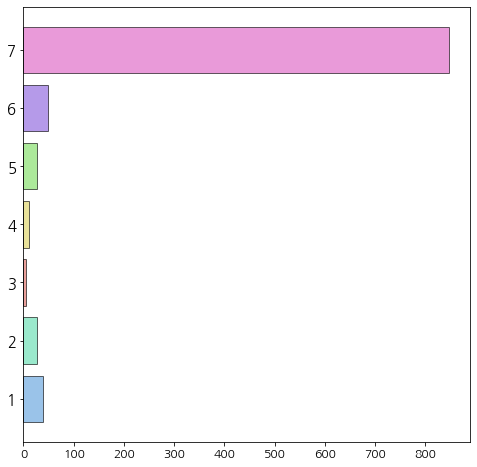

In [74]:
region_data = Counter(rfm_score['Recency']).most_common() ## 데이터 개수가 많은 순으로 출력
region_data = region_data[:7] ## 거주지역 총 7군데

data = [x[1] for x in region_data] ## 데이터 개수
regions = [x[0] for x in region_data] ## 국가

## 수평 바차트에서 데이터 개수와 나라를 맨위로 출력하기 위해서 리스트 순서를 바꿈
regions.reverse()
data.reverse()

## 시각화
fig =plt.figure(figsize=(8,8))
 
fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정

plt.barh(regions, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()

##2. 매출 기여도의 분산을 최대화하는 가중치 찾기

In [76]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [153]:
##최적 가중치 찾기 위한 함수 및 사전 준비 코드

def get_score(level, data, reverse = False):

    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score 

In [154]:
grid_number = 100 ## 눈금 개수, 너무 크게 잡으면 메모리 문제가 발생할 수 있음.
weights = []
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 7 ## 클래스 개수
class_level = np.linspace(1,7,num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다.
total_amount_of_sales = rfm_score['총_매출액'].sum()

print(class_level)

##결과값
# 가중치와 RFM 점수를 이용한 총 점수가 6.142 보다 크면 1등급
# 가중치와 RFM 점수를 이용한 총 점수가 1.857 이하면 7등급

[1.85714286 2.71428571 3.57142857 4.42857143 5.28571429 6.14285714]


In [155]:
rfm_score.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       'Recency_reverse'],
      dtype='object')

In [156]:
max_std = 0 ## 표준편차 초기값
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## 주어진 가중치에 따른 고객별 점수 계산
    score = w[0]*rfm_score['Recency'] + \
                        w[1]*rfm_score['Frequency'] + \
                        w[2]*rfm_score['Monetary'] 
    rfm_score['Class'] = get_score(class_level,score,True) ## 점수를 이용하여 고객별 등급 부여
    ## 등급별로 구매금액을 집계한다.
    grouped_rfm_score = rfm_score.groupby('Class')['총_매출액'].sum().reset_index()
        
    ## 클래스별 구매금액을 총구매금액으로 나누어 클래스별 매출 기여도 계산
    grouped_rfm_score['총_매출액'] = grouped_rfm_score['총_매출액'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['총_매출액'].std() ## 매출 기여도의 표준편차 계산
    if max_std <= std_sales:
        max_std = std_sales ## 표준편차 최대값 업데이트
        optimal_weights = w  ## 가중치 업데이트



[Finding Optimal weights]: 100%|██████████| 5151/5151 [03:02<00:00, 28.30it/s]


In [157]:
print(optimal_weights)

#가중치 결과값

(0.86, 0.14, 0.0)


##3. 가중치와 RFM점수를 이용하여 고객별로 등급 부여

In [158]:
score = optimal_weights[0]*rfm_score['Recency'] + \
        optimal_weights[1]*rfm_score['Frequency'] + \
        optimal_weights[2]*rfm_score['Monetary'] ## 고객별 점수 계산
 
rfm_score['Class'] = get_score(class_level,score,True) ## 고객별 등급 부여

##4. 각 등급별 매출 기여도 확인

In [159]:
## 클래스별 고객 수 계산
temp_rfm_score1 = rfm_score.groupby('Class')['고객ID'].count().reset_index().rename(columns={'고객ID':'Count'})
 
## 클래스별 구매금액(매출)계산
temp_rfm_score2 = rfm_score.groupby('Class')['총_매출액'].sum().reset_index()
 
## 클래스별 매출 기여도 계산
temp_rfm_score2['총_매출액'] = temp_rfm_score2['총_매출액'].map(lambda x : x/total_amount_of_sales)
 
## 데이터 결합
result_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('Class'))

result_df


# 결과값 왕 이상하다..
# 1등급 고객이 846명이고 매출액의 89%를 차지함
# Recency 7점이 너무 많고 (평균이 6.489 였음), 가중치도 너무 높게 나옴(65%)
# Recency 점수가 높은사랑미 7점이 아니라 1점일 가능성이 높음

,Class,Count,총_매출액
0,1,846,0.890905
1,2,48,0.031511
2,3,26,0.017175
3,4,11,0.005933
4,5,5,0.006311
5,6,26,0.022654
6,7,38,0.025510


#시도2)RFM을 통해 등급별 매출 기여도 확인

##Recency_reverse 기준

##1. 데이터 확인

In [96]:
import pandas as pd

rfm_score = pd.read_excel("/content/drive/MyDrive/230322_ashopping_R수정.xlsx")
rfm_score

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,Recency_reverse
0,1,0,4007080,17,235711,1,5445,1,4,0,...,7,6,6,6,6,6,6,6,6,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,6,6,6,5,3,6,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,7,7,6,6,7,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,5,6,6,6,6,6,5,6,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,6,5,5,6,6,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,6,7,6,7,6,6,6,6,6,1
996,997,0,10315690,49,210524,6,186545,1,2,0,...,7,6,5,6,5,7,6,6,6,1
997,998,0,2741290,10,274129,8,260700,2,4,0,...,6,6,6,5,6,4,5,6,5,1
998,999,0,11268990,15,751266,20,347700,1,3,0,...,4,4,4,4,4,5,5,4,4,1


In [97]:
rfm_score.describe()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,Recency_reverse
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.067000,7.068690e+06,26.602000,3.173611e+05,16.027000,292371.670000,1.266000,3.093000,0.459000,...,5.877000,5.707000,5.81000,5.700000,5.383000,5.427000,5.672000,5.546000,5.526000,1.511000
std,288.819436,0.250147,6.966355e+06,21.280189,2.310413e+05,8.341334,111937.501042,0.442085,0.988599,0.498566,...,0.858258,0.733273,0.78391,0.787795,0.923669,0.992802,0.794385,0.781341,0.736115,1.445672
min,1.000000,0.000000,2.271880e+06,2.000000,2.246100e+04,1.000000,3750.000000,1.000000,1.000000,0.000000,...,4.000000,4.000000,4.00000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000
25%,250.750000,0.000000,3.303285e+06,13.000000,1.781558e+05,9.000000,261686.250000,1.000000,2.000000,0.000000,...,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000
50%,500.500000,0.000000,4.714785e+06,21.000000,2.626210e+05,17.000000,347500.000000,1.000000,3.000000,0.000000,...,6.000000,6.000000,6.00000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,1.000000
75%,750.250000,0.000000,7.900290e+06,32.000000,3.936732e+05,23.000000,365400.000000,2.000000,4.000000,1.000000,...,6.250000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
max,1000.000000,1.000000,7.707087e+07,203.000000,2.680100e+06,30.000000,400600.000000,2.000000,4.000000,1.000000,...,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [98]:
rfm_score.isnull().sum()

고객ID                  0
이탈여부                  0
총_매출액                 0
방문빈도                  0
1회_평균매출액              0
할인권_사용 횟수             0
총_할인_금액               0
고객등급                  0
구매유형                  0
클레임접수여부               0
구매_카테고리_수             0
거주지역                  0
성별                    0
고객_나이대                0
거래기간                  0
할인민감여부                0
멤버쉽_프로그램_가입전_만족도      0
멤버쉽_프로그램_가입후_만족도      0
Recency               0
Frequency             0
Monetary              0
상품_만족도                0
매장_만족도                0
서비스_만족도               0
상품_품질                 0
상품_다양성                0
가격_적절성                0
상품_진열_위치             66
상품_설명_표시            138
매장_청결성                0
공간_편의성                0
시야_확보성                0
음향_적절성                0
안내_표지판_설명             0
친절성                   0
신속성                   0
책임성                   0
정확성                   0
전문성                   0
Recency_reverse       0
dtype: int64

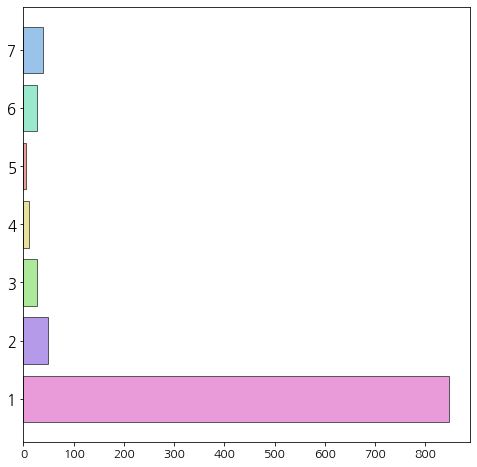

In [99]:
region_data = Counter(rfm_score['Recency_reverse']).most_common() ## 데이터 개수가 많은 순으로 출력
region_data = region_data[:7] ## 거주지역 총 7군데

data = [x[1] for x in region_data] ## 데이터 개수
regions = [x[0] for x in region_data] ## 국가

## 수평 바차트에서 데이터 개수와 나라를 맨위로 출력하기 위해서 리스트 순서를 바꿈
regions.reverse()
data.reverse()

## 시각화
fig =plt.figure(figsize=(8,8))
 
fig.set_facecolor('white') ## 캔버스 색깔
colors = sns.color_palette('hls',len(data)) ## color 생성
plt.yticks(fontsize=15) # y축 눈금 라벨 폰트사이즈 설정
plt.xticks(fontsize=12) # x축 눈금 라벨 폰트사이즈 설정

plt.barh(regions, data, color=colors,alpha=0.6,edgecolor='k') ## 수평바차트 생성
plt.show()


# Recency의 최고점수인 7점의 분포가 이상할만큼 너무 많았음. 
# 최종 결과값도 이상하게 나옴..
# 많이 방문한 사람들(충성고객)이 적게 분포하고, 한번씩 와보는 사람들이 많은게 일반적인 분포라 생각, 
# 수치를 reverse 시켜서 분석 다시 해보기로 함. 

##2. 매출 기여도의 분산을 최대화하는 가중치 찾기

In [89]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [100]:
##최적 가중치 찾기 위한 함수 및 사전 준비 코드

def get_score(level, data, reverse = False):

    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score 

In [144]:
grid_number = 100 ## 눈금 개수, 너무 크게 잡으면 메모리 문제가 발생할 수 있음.
weights = []
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 7 ## 클래스 개수
class_level = np.linspace(1,7,num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다.
total_amount_of_sales = rfm_score['총_매출액'].sum()

print(class_level)


##결과값
# 가중치와 RFM 점수를 이용한 총 점수가 6.142 보다 크면 1등급
# 가중치와 RFM 점수를 이용한 총 점수가 1.857 이하면 7등급

[1.85714286 2.71428571 3.57142857 4.42857143 5.28571429 6.14285714]


In [102]:
rfm_score.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       'Recency_reverse'],
      dtype='object')

In [145]:
max_std = 0 ## 표준편차 초기값
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## 주어진 가중치에 따른 고객별 점수 계산
    score = w[0]*rfm_score['Recency_reverse'] + \
                        w[1]*rfm_score['Frequency'] + \
                        w[2]*rfm_score['Monetary'] 
    rfm_score['Class'] = get_score(class_level,score,True) ## 점수를 이용하여 고객별 등급 부여
    ## 등급별로 구매금액을 집계한다.
    grouped_rfm_score = rfm_score.groupby('Class')['총_매출액'].sum().reset_index()
        
    ## 클래스별 구매금액을 총구매금액으로 나누어 클래스별 매출 기여도 계산
    grouped_rfm_score['총_매출액'] = grouped_rfm_score['총_매출액'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['총_매출액'].std() ## 매출 기여도의 표준편차 계산
    if max_std <= std_sales:
        max_std = std_sales ## 표준편차 최대값 업데이트
        optimal_weights = w  ## 가중치 업데이트


[Finding Optimal weights]: 100%|██████████| 5151/5151 [02:16<00:00, 37.77it/s]


In [146]:
print(optimal_weights)

#가중치 결과값

(0.86, 0.14, 0.0)


##3. 가중치와 RFM점수를 이용하여 고객별로 등급 부여

In [147]:
score = optimal_weights[0]*rfm_score['Recency_reverse'] + \
        optimal_weights[1]*rfm_score['Frequency'] + \
        optimal_weights[2]*rfm_score['Monetary'] ## 고객별 점수 계산
 
rfm_score['Class'] = get_score(class_level,score,True) ## 고객별 등급 부여

##4. 각 등급별 매출 기여도 확인

In [148]:
## 클래스별 고객 수 계산
temp_rfm_score1 = rfm_score.groupby('Class')['고객ID'].count().reset_index().rename(columns={'고객ID':'Count'})
 
## 클래스별 구매금액(매출)계산
temp_rfm_score2 = rfm_score.groupby('Class')['총_매출액'].sum().reset_index()
 
## 클래스별 매출 기여도 계산
temp_rfm_score2['총_매출액'] = temp_rfm_score2['총_매출액'].map(lambda x : x/total_amount_of_sales)
 
## 데이터 결합
result_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('Class'))

result_df



# 7등급 고객이 846명 차지, 매출 기여도가 89% 가까이 된다. 
# 매출 기여도가 등급이 더 높은 고객에게서 나와야 하는데 정 반대의 결과가 나온 꼴.
# 적은 수의 높은 등급 고객들이 높은 매출 기여도를 차지한다. 라는 가정 (파레토 법칙)

,Class,Count,총_매출액
0,1,38,0.025510
1,2,26,0.022654
2,3,5,0.006311
3,4,11,0.005933
4,5,26,0.017175
5,6,48,0.031511
6,7,846,0.890905


#시도2 + 제약조건 추가
##"등급이 높을수록 매출 기여도가 높아야 한다"

In [160]:
#'Class'열이 겹치거나 추가로 생길까봐 데이터프레임 초기화

import pandas as pd

rfm_score = pd.read_excel("/content/drive/MyDrive/230322_ashopping_R수정.xlsx")

In [161]:
rfm_score.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용 횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       'Recency_reverse'],
      dtype='object')

In [162]:
def get_score(level, data, reverse = False):

    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score 

In [163]:
grid_number = 100 ## 눈금 개수, 너무 크게 잡으면 메모리 문제가 발생할 수 있음.
weights = []
for j in range(grid_number+1):
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 7 ## 클래스 개수
class_level = np.linspace(1,7,num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다.
total_amount_of_sales = rfm_score['총_매출액'].sum()

print(class_level)


[1.85714286 2.71428571 3.57142857 4.42857143 5.28571429 6.14285714]


In [164]:
max_std = 0 ## 표준편차 초기값
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## 주어진 가중치에 따른 고객별 점수 계산
    score = w[0]*rfm_score['Recency_reverse'] + \
                        w[1]*rfm_score['Frequency'] + \
                        w[2]*rfm_score['Monetary'] 
    rfm_score['Class'] = get_score(class_level,score,True) ## 점수를 이용하여 고객별 등급 부여
    ## 등급별로 구매금액을 집계한다.
    grouped_rfm_score = rfm_score.groupby('Class')['총_매출액'].sum().reset_index()
    
    ## 제약조건 추가 - 등급이 높은 고객들의 매출이 낮은 등급의 고객들보다 커야한다.
    grouped_rfm_score = grouped_rfm_score.sort_values('Class')
    
    temp_monetary = list(grouped_rfm_score['총_매출액'])
    if temp_monetary != sorted(temp_monetary,reverse=True):
        continue
    
    ## 클래스별 구매금액을 총구매금액으로 나누어 클래스별 매출 기여도 계산
    grouped_rfm_score['총_매출액'] = grouped_rfm_score['총_매출액'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['총_매출액'].std() ## 매출 기여도의 표준편차 계산
    if max_std <= std_sales:
        max_std = std_sales ## 표준편차 최대값 업데이트
        optimal_weights = w  ## 가중치 업데이트

[Finding Optimal weights]: 100%|██████████| 5151/5151 [02:15<00:00, 37.97it/s]


In [165]:
print(optimal_weights)

#제약조건을 걸어 새롭게 부여받은 가중치

(0.0, 0.17, 0.83)


In [166]:
score = optimal_weights[0]*rfm_score['Recency_reverse'] + \
        optimal_weights[1]*rfm_score['Frequency'] + \
        optimal_weights[2]*rfm_score['Monetary'] ## 고객별 점수 계산
 
rfm_score['Class'] = get_score(class_level,score,True) ## 고객별 등급 부여

In [167]:
## 클래스별 고객 수 계산
temp_rfm_score1 = rfm_score.groupby('Class')['고객ID'].count().reset_index().rename(columns={'고객ID':'Count'})
 
## 클래스별 구매금액(매출)계산
temp_rfm_score2 = rfm_score.groupby('Class')['총_매출액'].sum().reset_index()
 
## 클래스별 매출 기여도 계산
temp_rfm_score2['총_매출액'] = temp_rfm_score2['총_매출액'].map(lambda x : x/total_amount_of_sales)
 
## 데이터 결합
result_df = pd.merge(temp_rfm_score1,temp_rfm_score2,how='left',on=('Class'))

result_df

,Class,Count,총_매출액
0,1,115,0.356910
1,2,132,0.188044
2,3,167,0.155232
3,4,197,0.130013
4,5,201,0.099864
5,6,117,0.045883
6,7,71,0.024055


In [169]:
rfm_score

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,Recency_reverse,Class
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,6,1,4
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,6,5,3,6,6,6,6,5
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,7,7,6,6,7,1,6
3,4,0,5946600,17,349800,1,5195,1,4,1,...,5,6,6,6,6,6,5,6,1,3
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,6,5,5,6,6,5,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,5135090,8,641886,3,44445,1,3,1,...,7,6,7,6,6,6,6,6,1,4
996,997,0,10315690,49,210524,6,186545,1,2,0,...,6,5,6,5,7,6,6,6,1,2
997,998,0,2741290,10,274129,8,260700,2,4,0,...,6,6,5,6,4,5,6,5,1,6
998,999,0,11268990,15,751266,20,347700,1,3,0,...,4,4,4,4,5,5,4,4,1,2


In [171]:
rfm_score.to_excel('ashopping_class생성.xlsx', index = None)